Tâche 8 : bands.ipynb

Loudeche Maxime.

Ce notebook permet de télécharger la structure de bande du matériau "mp-1023936" : WSe2. Il permet également d'analyser celle-ci sur 3 points :

1. Déterminer la bande interdite.
2. Trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.
3. calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

In [16]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.electronic_structure.plotter import BSPlotter
from matplotlib import pyplot as plt
import pymatgen.electronic_structure.bandstructure as bandstr
import numpy as np
with MPRester("1UZlSnaTONTXfpKB") as m:
    structure = m.get_structure_by_material_id("mp-1023936")
    bandstructure = m.get_bandstructure_by_material_id("mp-1023936")

1. Détermination de la bande interdite :

On a une bande directe :  True
Energie du "band gap" :  1.5384 eV
Type de transition de bande :  K-K
Energie de Fermi :  -1.42015238


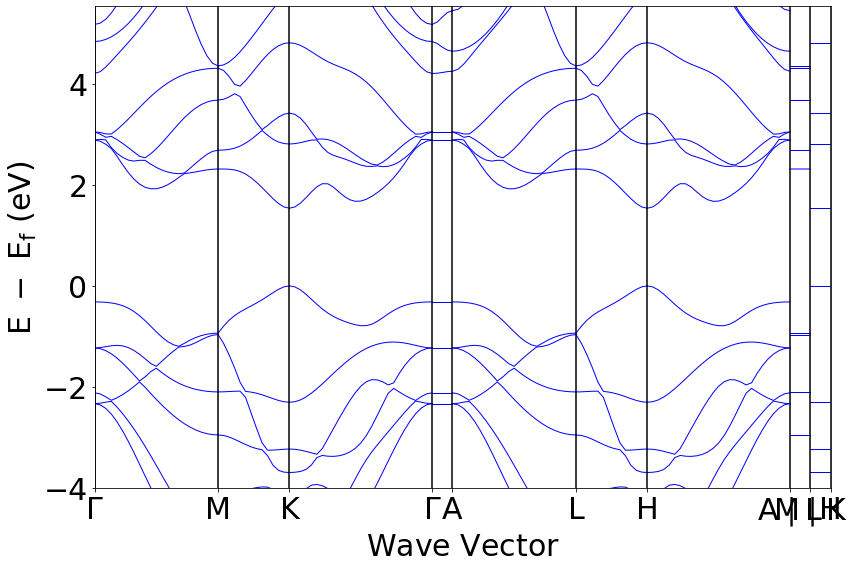

In [14]:
#Données sur la bande interdite
band_gap = bandstructure.get_band_gap()

#Caractéristique de cette bande 
print('On a une bande directe : ', band_gap['direct'])
print('Energie du \"band gap\" : ', band_gap['energy'], 'eV')
print('Type de transition de bande : ', band_gap['transition'])
print('Energie de Fermi : ', bandstructure.efermi)

#Figure de bande
fig = BSPlotter(bandstructure)

#Données sur la structure de bande
data = fig.bs_plot_data()
ticks = data.get('ticks')
energy = data.get('energy')
branche = ticks.get('distance')

#Montrer la structure de bande
fig.show()

Comme remarquer : on a une bande directe c'est-à-dire que le maximum de la bande de valence (vbm) et le minimum de la bande de conduction (cbm), la différence entre les vecteurs d'onde de ces deux extrema est nulle : ils sont alignés.

On peut en conclure que nous sommes en présence d'un matériau semi-conducteur ("Band Gap Energy" entre 1 et 1.5 eV)




2. Recherche des directions présentant le plus et moins de dispersion :

Pour se faire nous allons calculer les pentes pour chaque branche. La dipersion minimale (rsp. maximale) se trouve dans la branche qui a la pente minimale (rsp. maximale) et suit la direction de cette pente. 

-- La dispersion maximale (vbm) = flèche rouge :  

L'énergie du point de plus grande dispersion (vbm) est :  -1.473 eV
La dispersion maximale (vbm) se situe dans la branche M-K 
 

-- La dispersion minimale (vbm) = flèche verte :  

L'énergie du point de plus petite dispersion (vbm) est :  -1.7907 eV
La dispersion minimale (vbm) se situe dans la branche Gamma-A 
 

-- La dispersion maximale (cbm) = flèche bleue :  

L'énergie du point de plus grande dispersion (cbm) est :  0.0654 eV
La dispersion maximale (cbm) se situe dans la branche M-K 
 

-- La dispersion minimale (cbm) = flèche verte :  

L'énergie du point de plus petite dispersion (cbm) est :  1.4168999999999998 eV
La dispersion minimale (cbm) se situe dans la branche Gamma-A 
 

Toutes les énergies données sont E et non E-Ef !


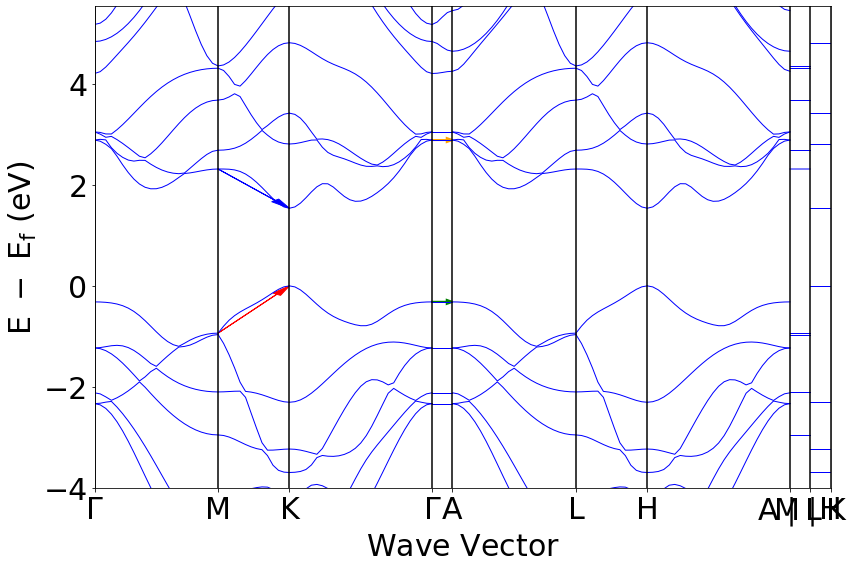

In [112]:
#Données sur la dernière bande de valence
vbm = bandstructure.get_vbm()

#Energie du point 0 (E = Ef) :
E0 = vbm['energy']

#Données du vbm :
print('-- La dispersion maximale (vbm) = flèche rouge : ', '\n')
print('L\'énergie du point de plus grande dispersion (vbm) est : ', vbm['energy'], 'eV')
print('La dispersion maximale (vbm) se situe dans la branche M-K', '\n', '\n')

print('-- La dispersion minimale (vbm) = flèche verte : ', '\n')
print('L\'énergie du point de plus petite dispersion (vbm) est : ', energy[3].get('1')[11][0] + E0, 'eV')
print('La dispersion minimale (vbm) se situe dans la branche Gamma-A', '\n', '\n')

#Données sur la première bande de conduction :
cbm = bandstructure.get_cbm()

#Données du cbm :
print('-- La dispersion maximale (cbm) = flèche bleue : ', '\n')
print('L\'énergie du point de plus grande dispersion (cbm) est : ', cbm['energy'], 'eV')
print('La dispersion maximale (cbm) se situe dans la branche M-K', '\n', '\n')

print('-- La dispersion minimale (cbm) = flèche verte : ', '\n')
print('L\'énergie du point de plus petite dispersion (cbm) est : ', energy[3].get('1')[12][0] + E0, 'eV')
print('La dispersion minimale (cbm) se situe dans la branche Gamma-A', '\n', '\n')

print('Toutes les énergies données sont E et non E-Ef !')

#Coordonnées pour le dessin de la flèche rouge :
x_branche_M = branche[1]
y_branche_M_vbm = energy[1].get('1')[11][0]

x_branche_K = branche[3]
y_branche_K_vbm = energy[1].get('1')[11][13]

dx_MK = x_branche_K - x_branche_M
dy_MK_vbm = y_branche_K_vbm - y_branche_M_vbm


#Coordonées pour le dessin de la flèche verte :
x_branche_Gamma = branche[5]
y_branche_Gamma_vbm = energy[3].get('1')[11][0]

x_branche_A = branche[7]
y_branche_A_vbm = energy[3].get('1')[11][4]

dx_GammaA = x_branche_A - x_branche_Gamma
dy_GammaA_vbm = y_branche_A_vbm - y_branche_Gamma_vbm


#Coordonnées pour le dessin de la flèche bleue :
y_branche_M_cbm = energy[1].get('1')[12][0]
y_branche_K_cbm = energy[1].get('1')[12][13]

dy_MK_cbm = y_branche_K_cbm - y_branche_M_cbm


#Coordonées pour le dessin de la flèche orange : 
y_branche_Gamma_cbm = energy[3].get('1')[12][0]
y_branche_A_cbm = energy[3].get('1')[12][4]

dy_GammaA_cbm = y_branche_A_cbm - y_branche_Gamma_cbm


#Dessin des flèches :
fig.get_plot()
#Flèche rouge
plt.arrow(x_branche_M, y_branche_M_vbm, dx_MK, dy_MK_vbm, 
          head_width=0.08, head_length=0.2, linewidth=1, color='red',length_includes_head=True)
#Flèche verte
plt.arrow(x_branche_Gamma, y_branche_Gamma_vbm, dx_GammaA, dy_GammaA_vbm,
         head_width=0.08, head_length=0.05, linewidth=2, color='green',length_includes_head=True)
#Flèche bleue
plt.arrow(x_branche_M, y_branche_M_cbm, dx_MK, dy_MK_cbm,
         head_width=0.08, head_length=0.2, linewidth=1, color='blue',length_includes_head=True)
#Flèche orange
plt.arrow(x_branche_Gamma, y_branche_Gamma_cbm, dx_GammaA, dy_GammaA_cbm,
        head_width=0.08, head_length=0.05, linewidth=2, color='orange',length_includes_head=True)

3. Calculs de la masse effective au sommet (rsp. base) de la dernière (rsp. première) bande de valence (rsp. conduction) en supposant une dispersion parabolique.

Pour calculer la masse effective, on utilise l'équation : 1/m* = (1/h_bar)² * (d²E/dk²). Or avec l'approximation d'une dispersion parabolique, il est correct d'écrire que : E = (h_bar² * k²)/2m*.

Donc finalement comme on peut facilement obtenir E pour cbm et vbm, il n'est pas compliqué d'approximer la masse effective comme : m* = (h_bar² * k²)/2E.

In [122]:
#h_bar en eV*s
h_bar = 6.582119569e-16

#Le vecteur d'onde en 1/Angstrom :
k = np.linalg.norm(vbm['kpoint'].cart_coords)
#Ce vecteur d'onde est le même pour vbm et cbm comme on a une bande directe

#Energie vbm en eV :
E_vbm = vbm['energy']

#Energie cbm en eV :
E_cbm = cbm['energy']

#Masse effective pour le sommet de la dernière bande de valence :
m_eff_vbm = ( (h_bar**2) * (k**2) )/(2 * E_vbm)
print('La masse effective au sommet de la dernière bande de valence : m* = ', m_eff_vbm, 'kg\n')

#Masse effective pour la base de la première bande de conduction :
m_eff_cbm = ( (h_bar**2) * (k**2) )/(2 * E_cbm)
print('La masse effective à la base de la première bande de conduction : m* = ', m_eff_cbm, 'kg\n')


La masse effective au sommet de la dernière bande de valence : m* =  -2.3330972664688377e-31 kg

La masse effective à la base de la première bande de conduction : m* =  5.254819990074309e-30 kg

